# Credit Scoring

In [72]:
import pandas as pd
import numpy as np

data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

C:\Users\rusbe\AppData\Local\Temp\ipykernel_25060\2957216300.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('data/train.csv')


In [73]:
data_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


Сразу можно заметить, что присутствуют пропуски (NaN), а также прочерки в признаках "Occupation" и "Credit_Mix"

**ID** - Represents a unique identification of an entry

**Customer_ID** - Represents a unique identification of a person

**Month** - Represents the month of the year

**Name** - Represents the name of a person

**Age** - Represents the age of the person

**SSN** - Represents the social security number of a person

**Occupation** - Represents the occupation of the person

**Annual_Income** - Represents the annual income of the person

**Monthly_Inhand_Salary** - Represents the monthly base salary of a person

**Num_Bank_Accounts** - Represents the number of bank accounts a person holds

**Num_Credit_Card** - Represents the number of other credit cards held by a person

**Interest_Rate** - Represents the interest rate on credit card

**Num_of_Loan** - Represents the number of loans taken from the bank

**Type_of_Loan** - Represents the types of loan taken by a person

**Delay_from_due_date** - Represents the average number of days delayed from the payment date

**Num_of_Delayed_Payment** - Represents the average number of payments delayed by a person

**Changed_Credit_Limit** - Represents the percentage change in credit card limit

**Num_Credit_Inquiries** - Represents the number of credit card inquiries

**Credit_Mix** - Represents the classification of the mix of credits

**Outstanding_Debt** - Represents the remaining debt to be paid (in USD)

**Credit_Utilization_Ratio** - Represents the utilization ratio of credit card

**Credit_History_Age** - Represents the age of credit history of the person

**Payment_of_Min_Amount** - Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month** - Represents the monthly EMI payments (in USD)

**Amount_invested_monthly** - Represents the monthly amount invested by the customer (in USD)

**Payment_Behaviour** - Represents the payment behavior of the customer (in USD)

**Monthly_Balance** - Represents the monthly balance amount of the customer (in USD)

In [74]:
print(f"Train size = {data_train.shape}")

Train size = (100000, 28)


In [75]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [76]:
data_train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


## Data Preprocessing

1. ID, Name, SSN - бесполезные признаки (по-моему)
2. Заполниить пропуски и уберем прочерки в признаках "Occupation" и "Credit_Mix"
3. Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt,Credit_Mix, Monthly_Balance числовые признаки, но показаны как категориальные (пофиксим) 
4. А также некорректные значения:

    Num_Credit_Card имеет нули

    Num_Bank_Accounts содержит отрицательные значения

### 1. Удалим ненужные признаки 

In [77]:
data_train.drop(["ID","Name","SSN"],axis=1, inplace=True)

In [78]:
data_train.duplicated().sum()

np.int64(0)

### 2. Исправляем тип признаков

In [79]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 
            'Changed_Credit_Limit','Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

for i in N_to_fix:
    data_train[i] = pd.to_numeric(data_train[i], errors='coerce').fillna(0).astype(float)

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

### 3. Избавимся от пропусков и прочерков

In [80]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}
data_train['Credit_Mix'] = data_train['Credit_Mix'].map(m)

In [81]:
occ = {'Scientist': 1, '_______': np.nan, 'Teacher': 3, 'Engineer': 4, 'Entrepreneur': 5,
       'Developer': 6, 'Lawyer': 7, 'Media_Manager': 8, 'Doctor': 9, 'Journalist': 10,
       'Manager': 11, 'Accountant': 12, 'Musician': 13, 'Mechanic': 14, 'Writer': 15,
       'Architect': 16}

data_train['Occupation'] = data_train['Occupation'].map(occ)

In [82]:
for i in data_train["Type_of_Loan"].value_counts().head(9).index[1:]:
    data_train[i] = data_train["Type_of_Loan"].fillna('').str.contains(i).astype(int)
del data_train["Type_of_Loan"]

In [83]:
data_train.head(5)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,CUS_0xd40,January,23.0,1.0,19114.12,1824.843333,3,4,3,4.0,...,312.494089,Good,1,1,0,0,0,0,1,1
1,CUS_0xd40,February,23.0,1.0,19114.12,NaN,3,4,3,4.0,...,284.629162,Good,1,1,0,0,0,0,1,1
2,CUS_0xd40,March,-500.0,1.0,19114.12,NaN,3,4,3,4.0,...,331.209863,Good,1,1,0,0,0,0,1,1
3,CUS_0xd40,April,23.0,1.0,19114.12,NaN,3,4,3,4.0,...,223.451310,Good,1,1,0,0,0,0,1,1
4,CUS_0xd40,May,23.0,1.0,19114.12,1824.843333,3,4,3,4.0,...,341.489231,Good,1,1,0,0,0,0,1,1


In [84]:
def parse_years_and_months(arg):
    if isinstance(arg,str):
        age_parts=arg.split("Years and")
        years=int(age_parts[0]) if "Years" in arg else 0
        months_parts=age_parts[1].split("Months")[0] if "Months" in arg else 0
        months=int(months_parts)
        age=years*12 + months
        return age
    else:
        return 0

In [85]:
data_train["Credit_History_Age"] = data_train["Credit_History_Age"].apply(parse_years_and_months)

Преобразуем столбец Customer_ID в последовательный числовой идентификатор

In [86]:
data_train["Customer_ID"].value_counts()

Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
             ..
CUS_0x4157    8
CUS_0x5407    8
CUS_0x284a    8
CUS_0x95ee    8
CUS_0x1cdb    8
Name: count, Length: 12500, dtype: int64

In [87]:
data_train["Customer_ID"] = pd.factorize(data_train["Customer_ID"])[0] + 1

In [88]:
Numericals = data_train.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit-Builder Loan',
       'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
       'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [89]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=1)

In [90]:
data_train[Numericals] = data_train.groupby('Customer_ID')[Numericals].transform(lambda x: impute.fit_transform(x.values.reshape(-1, 1)).flatten())

In [91]:
data_train[Numericals].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  float64
 13  Outstanding_Debt          100000 non-null  fl

### 4. Исправляем некорректные значения

In [92]:
data_train['Num_Bank_Accounts']= data_train['Num_Bank_Accounts'].abs()

In [93]:
data_train["Num_Credit_Card"].replace(0,1,inplace=True)

C:\Users\rusbe\AppData\Local\Temp\ipykernel_25060\182748602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["Num_Credit_Card"].replace(0,1,inplace=True)


### 5. Преобразуем категориальные признаки

In [94]:
data_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [95]:
data_train["Payment_Behaviour"] = data_train["Payment_Behaviour"].replace('!@9#%8',np.nan)

In [96]:
data_train["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [97]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
data_train[["Payment_Behaviour"]] = imputer.fit_transform(data_train[["Payment_Behaviour"]])

data_train["Payment_Behaviour"].count()

np.int64(100000)

In [98]:
categorical = data_train.select_dtypes(include=object)
categorical

,Month,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,No,High_spent_Small_value_payments,Good
1,February,No,Low_spent_Large_value_payments,Good
2,March,No,Low_spent_Medium_value_payments,Good
3,April,No,Low_spent_Small_value_payments,Good
4,May,No,High_spent_Medium_value_payments,Good
...,...,...,...,...
99995,April,No,High_spent_Large_value_payments,Poor
99996,May,No,High_spent_Medium_value_payments,Poor
99997,June,No,High_spent_Large_value_payments,Poor
99998,July,No,Low_spent_Large_value_payments,Standard


In [228]:
data_train = pd.get_dummies(data_train.drop(["Credit_Score"],axis=1),drop_first=True)

In [61]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  float64
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [99]:
data_train.drop(["Payment_of_Min_Amount"],axis=1, inplace=True)

In [231]:
df_credit_score = pd.read_csv("data/train.csv")

C:\Users\rusbe\AppData\Local\Temp\ipykernel_6400\2719261924.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credit_score = pd.read_csv("data/train.csv")


In [100]:
data_train

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,January,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,312.494089,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,February,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,284.629162,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,March,-500.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,331.209863,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,April,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,223.451310,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,May,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,341.489231,Good,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500,April,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,479.866228,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500,May,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,496.651610,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500,June,25.0,14.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,...,516.809083,Poor,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500,July,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,319.164979,Standard,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [101]:
m={"Poor":0, "Standard":1, "Good":2}
data_train["Credit_Score"]=data_train["Credit_Score"].map(m)

data_train

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,1,January,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,312.494089,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,February,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,284.629162,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,March,-500.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,331.209863,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1,April,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,223.451310,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,May,23.0,1.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,341.489231,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12500,April,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,479.866228,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99996,12500,May,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,496.651610,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99997,12500,June,25.0,14.0,39628.99,3359.415833,4.0,6.0,5729.0,2.0,...,516.809083,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
99998,12500,July,25.0,14.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,...,319.164979,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [109]:
data_train = pd.get_dummies(data_train, drop_first=True)

## EDA

### Гипотезы

1. Возраст "хороших" заемшиков больше, чем возраст "плохих" заемщиков (Распределение возраста в зависимости от флага дефолта смещено в большую сторону при default=0)
2. Доход "хороших" заемщиков выше по сравнению с "плохими" заемщиками
3. Критерий Outstanding_Debt напрямую влияет на credit score, чем он меньше тем больше вероятность, что человек выплатит его банку

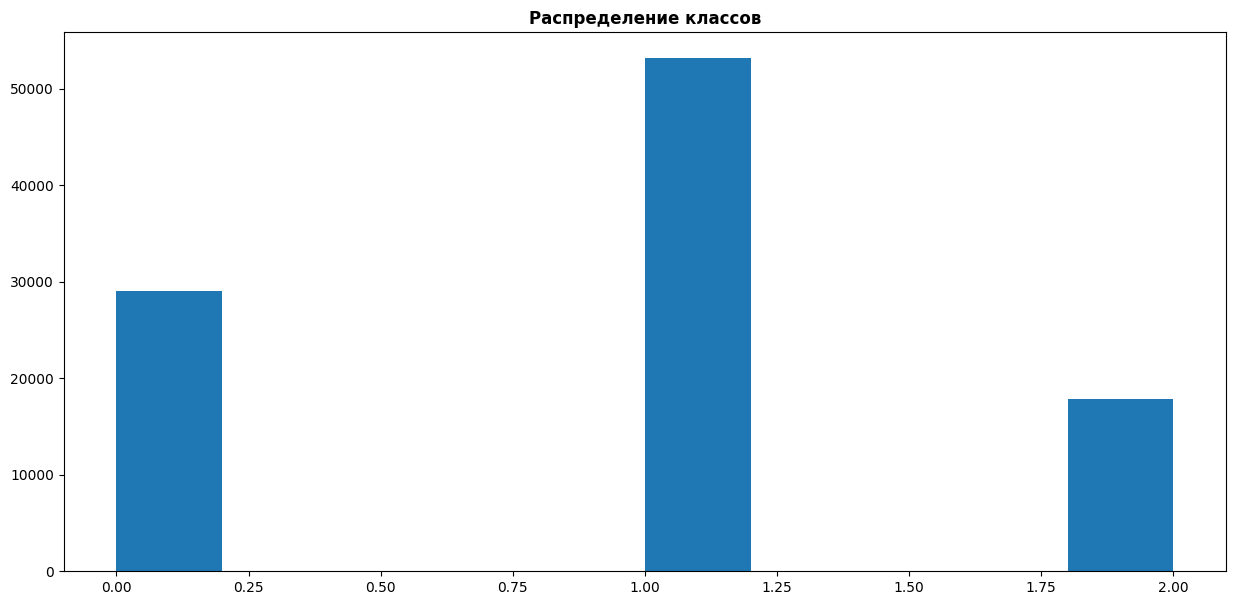

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.hist(data_train['Credit_Score'])

plt.title('Распределение классов',fontweight = "bold")
plt.show()

Присутсвтует дисбаланс классов, будем учитывать это при построении модели

### Первая гипотеза

Чем больше возраст тем больше вероятность возрашения долга

(array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.001, '0.001'),
  Text(0, 0.002, '0.002'),
  Text(0, 0.003, '0.003'),
  Text(0, 0.004, '0.004'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.006, '0.006')])

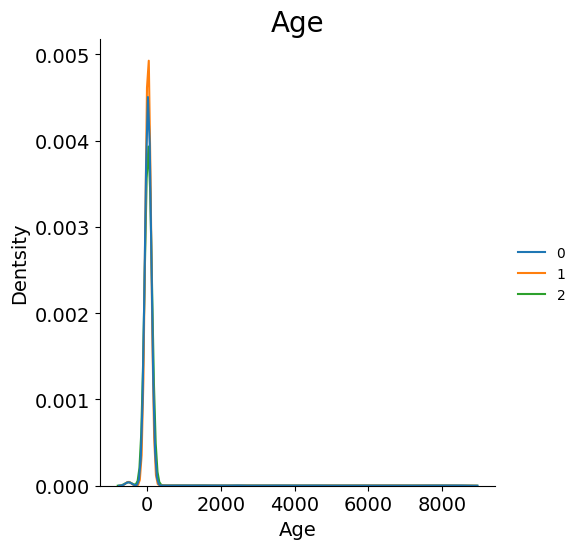

In [104]:
import seaborn as sns

sns.displot(
    {
        '0': data_train[data_train.Credit_Score == 0].Age,
        '1': data_train[data_train.Credit_Score == 1].Age,
        '2': data_train[data_train.Credit_Score == 2].Age,

    },
    kind="kde",
    common_norm=False
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

На графике выидно плохо, выведем в более понятном виде через медиану и среднее 

In [105]:
data_train.groupby('Credit_Score')['Age'].median()

Credit_Score
0    30.0
1    32.0
2    36.0
Name: Age, dtype: float64

In [106]:
data_train.groupby('Credit_Score')['Age'].mean()

Credit_Score
0    101.437444
1    105.568417
2    111.653971
Name: Age, dtype: float64

Здесь уже хорошо видно, что тип 2 (good) чаще встречается у клиентов с большим возврастом

### Гипотеза вторая

Доход "хороших" заемщиков выше по сравнению с "плохими" заемщиками

(array([0.0e+00, 5.0e-07, 1.0e-06, 1.5e-06, 2.0e-06, 2.5e-06]),
 [Text(0, 0.0, '0.0'),
  Text(0, 5e-07, '0.5'),
  Text(0, 1e-06, '1.0'),
  Text(0, 1.5e-06, '1.5'),
  Text(0, 2e-06, '2.0'),
  Text(0, 2.4999999999999998e-06, '2.5')])

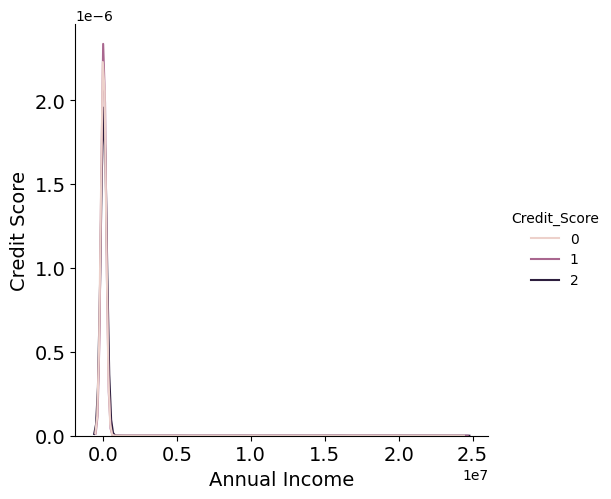

In [115]:
sns.displot(data_train, x='Annual_Income', hue='Credit_Score', kind='kde', common_norm=False)

plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000.]),
 [Text(0, -5000000.0, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 5000000.0, '0.5'),
  Text(0, 10000000.0, '1.0'),
  Text(0, 15000000.0, '1.5'),
  Text(0, 20000000.0, '2.0'),
  Text(0, 25000000.0, '2.5'),
  Text(0, 30000000.0, '3.0')])

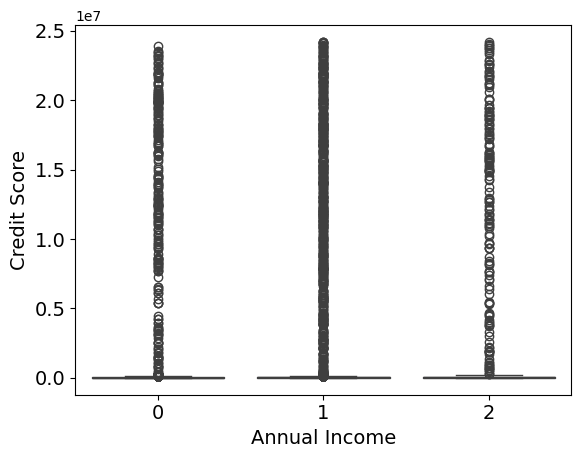

In [116]:
sns.boxplot(x='Credit_Score', y='Annual_Income', data=data_train)

plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Credit Score', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [117]:
data_train.groupby('Credit_Score')['Annual_Income'].median()

Credit_Score
0    29469.98
1    34963.82
2    42772.49
Name: Annual_Income, dtype: float64

In [118]:
data_train.groupby('Credit_Score')['Annual_Income'].mean()

Credit_Score
0    143431.441752
1    174926.817139
2    176723.789958
Name: Annual_Income, dtype: float64

По графикам опять же оценить ситуацию сложно, а вот на конкретных числах мы можем легко заметить, что зарплаты "хороших" плательшиков выше

## Корреляция

<Axes: >

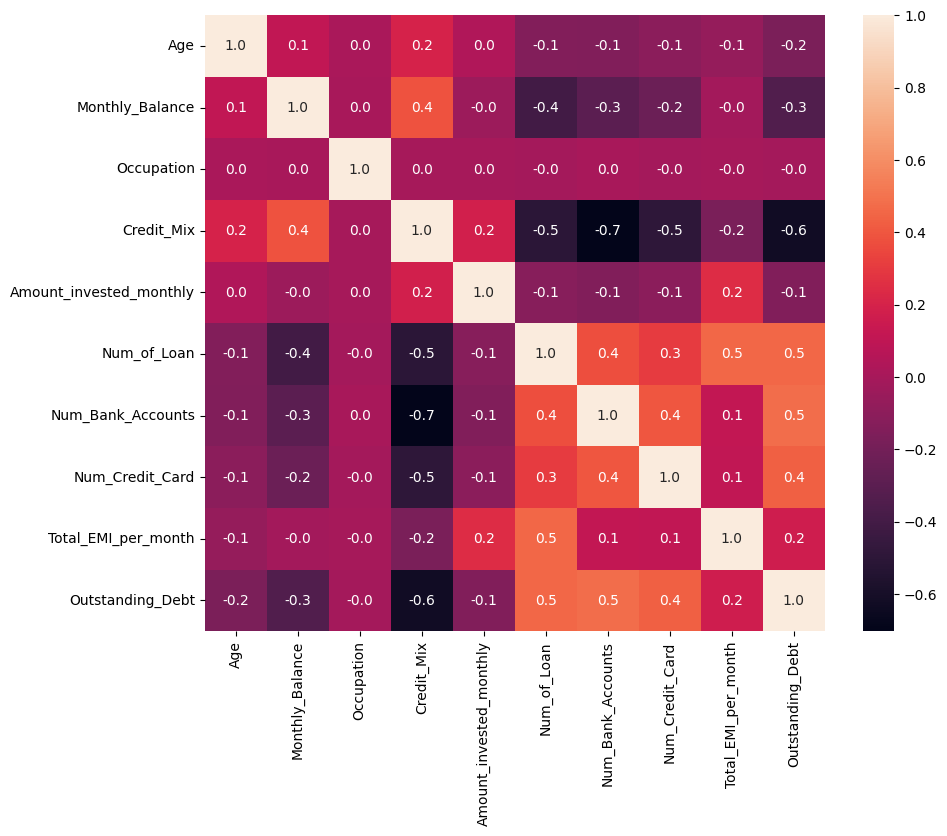

In [113]:
num_col = ['Age', 'Monthly_Balance', 'Occupation', 'Credit_Mix', 'Amount_invested_monthly',
            'Num_of_Loan', 'Num_Bank_Accounts', 'Num_Credit_Card',
              'Total_EMI_per_month', 'Outstanding_Debt']

plt.figure(figsize=(10, 8))

sns.heatmap(data_train[num_col].corr(method='spearman'), annot=True, fmt='.1f')

## Model

### Baseline Logistic regression

In [119]:
from sklearn.model_selection import train_test_split

X = data_train.drop('Credit_Score', axis=1)
y = data_train['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [134]:
# Импортируем нужные библиотеки
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, log_loss
from xgboost import XGBClassifier


# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Функция для оценки модели
# Функция для оценки модели
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Проверим, поддерживает ли модель predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')  # Для многоклассовой классификации
    else:
        roc_auc = None  # Некоторые модели, как SVC, могут не поддерживать predict_proba
        
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    logloss = log_loss(y_test, model.decision_function(X_test)) if hasattr(model, "decision_function") else None
    
    return {
        'ROC AUC': roc_auc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Log Loss': logloss
    }


# Создаем и обучаем модели
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'SVC': SVC(probability=True),
    'KNeighbors': KNeighborsClassifier()
}

# Оценка всех моделей
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model)

# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)


C:\Users\rusbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\rusbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
C:\Users\rusbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [18:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\rusbe\AppData\Lo

                      ROC AUC  Precision    Recall  F1 Score  Log Loss
Logistic Regression  0.786848   0.598995  0.595961  0.585743  4.109046
Random Forest        0.917766   0.787369  0.788746  0.787977       NaN
Gradient Boosting    0.860045   0.684963  0.695442  0.687325  5.359382
XGBoost              0.898777   0.742529  0.745597  0.743907       NaN
SVC                  0.820632   0.645249  0.669337  0.645117  2.414176
KNeighbors           0.713683   0.527776  0.487222  0.497100       NaN
